## Assignment 5

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/insurance_data.csv")

In [3]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
df.dtypes

age                 int64
bought_insurance    int64
dtype: object

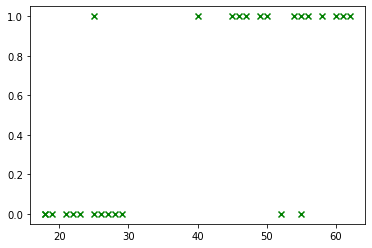

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='x',color='green')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,train_size =0.8)

In [7]:
type(df[['age']])

pandas.core.frame.DataFrame

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
y_predicted = model.predict(X_test)

In [11]:
y_predicted

array([1, 0, 1, 0, 0, 1], dtype=int64)

In [12]:
model.predict_proba(X_test)

array([[0.3140236 , 0.6859764 ],
       [0.81212612, 0.18787388],
       [0.15716447, 0.84283553],
       [0.79439464, 0.20560536],
       [0.82865825, 0.17134175],
       [0.2261067 , 0.7738933 ]])

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
model.coef_

array([[0.11226299]])

In [15]:
model.intercept_

array([-4.38272253])

In [16]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [17]:
def prediction_func(age):
    z = 0.14911562 *age - 5.103622
    y = sigmoid(z)
    return y

In [18]:
prediction_func(23)

0.15789655760254692

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [20]:
cm

array([[3, 0],
       [0, 3]], dtype=int64)

####  Exercise 1

In [21]:
data = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/HR_comma_sep.csv")

In [22]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [24]:
new_data = data[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]

In [25]:
new_data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


<AxesSubplot:xlabel='Department'>

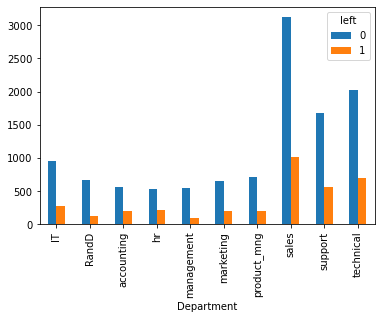

In [26]:
pd.crosstab(data.Department, data.left).plot(kind="bar")

<AxesSubplot:xlabel='salary'>

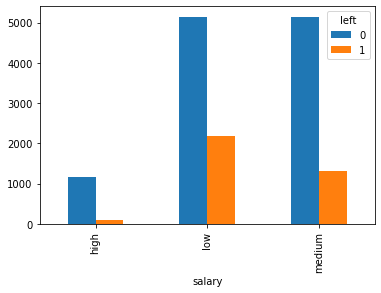

In [27]:
pd.crosstab(data.salary, data.left).plot(kind="bar")

In [28]:
dummies = pd.get_dummies(new_data.salary)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [29]:
merge_data = pd.concat([new_data, dummies], axis=1)
merge_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [30]:
df = merge_data.drop(["salary"], axis=1)
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [31]:
X = df
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [32]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=150)
model.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [36]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
model.score(X_test, y_test)

0.7776666666666666

#### Exercise 2

In [38]:
df = sns.load_dataset('iris')

In [39]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [41]:
df1=df.dropna(how="any",axis=0)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df1["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [43]:
df1.groupby(df["sepal_length"])["species"].value_counts()

sepal_length  species   
4.3           setosa        1
4.4           setosa        3
4.5           setosa        1
4.6           setosa        4
4.7           setosa        2
4.8           setosa        5
4.9           setosa        4
              versicolor    1
              virginica     1
5.0           setosa        8
              versicolor    2
5.1           setosa        8
              versicolor    1
5.2           setosa        3
              versicolor    1
5.3           setosa        1
5.4           setosa        5
              versicolor    1
5.5           versicolor    5
              setosa        2
5.6           versicolor    5
              virginica     1
5.7           versicolor    5
              setosa        2
              virginica     1
5.8           versicolor    3
              virginica     3
              setosa        1
5.9           versicolor    2
              virginica     1
6.0           versicolor    4
              virginica     2
6.1           v

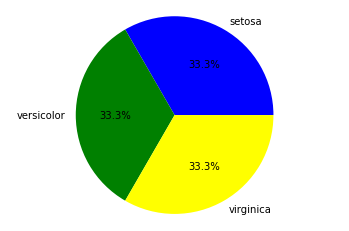

In [44]:
labels='setosa','versicolor','virginica'
colors = ['blue','green','yellow']
g=df.species.value_counts()
plt.pie(g,labels=labels,colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xticks(rotation=0)
plt.show()

In [45]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df.species

In [46]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size = 0.3)

In [47]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [48]:
model.predict(X_test)

array(['setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [49]:
model.score(X_test,Y_test)

0.9555555555555556

In [55]:
model.predict([5.2,3.1,])

KeyError: 5.2